In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy import NaN,NAN,nan
import warnings
warnings.filterwarnings('ignore') 


In [217]:
gcr=pd.read_csv('german_credit_data.csv') #독일 신용 데이터 # 좀오래됨

# 0.데이터 소개 -german_credit_data.csv
- 데이터 설명 과거 1000명의 대출자에  대한 신원 정보, 계좌, 대출거래 데이터 셋_ 신용도는 좋은 신용(good) ,(bad)로 나눔
- 변수 설명: Age (numeric)
   - Sex (text: male, female) = 성별
   - Job (numeric: 0 - unemployed/unskilled and non-resident, 1 - unskilled and resident, 2 – skilled/official, 3 - highly skilled) = 직업 형태
   - Housing (text: own, rent, or free) = 거주 형태
   - Saving accounts (text - little, moderate, quite rich, rich) = 예금계좌 보유금 정도
   - Checking account (text - little, moderate, rich) = 당좌계좌 보유금 정도
   - Credit amount (numeric, in DM)  = 대출 총액
   - Duration (numeric, in month) = 대출 기간
   - Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others) = 대출 목적
   - Risk (text: bad, good) = 신용도

# 0-1 데이터 목적
-신용도 분류를 목적으로 good bad의 binary 분류 모델을 생성

# 1. 데이터 확인 작업

In [218]:
gcr=gcr.iloc[:,1:]

In [219]:
gcr.info() #Saving accounts와 Checking amount에 null이 많음.
gcr.shape #(1000 행 10열 데이터)
gcr.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [220]:
gcr.isnull().sum()/gcr.shape[0] #각 컬럼의 na 비율

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
Risk                0.000
dtype: float64

In [221]:
gcr.describe().iloc[:,1:] #gcr 데이터의 연속형변수 기술통계표

,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,1.904000,3271.258000,20.903000
std,0.653614,2822.736876,12.058814
min,0.000000,250.000000,4.000000
25%,2.000000,1365.500000,12.000000
50%,2.000000,2319.500000,18.000000
75%,2.000000,3972.250000,24.000000
max,3.000000,18424.000000,72.000000


In [222]:
#명목형 컬럼 별 값들 확인
print(gcr.Sex.value_counts())
print('-'*50)
print(gcr.Job.value_counts())
print('-'*50)
print(gcr.Housing.value_counts())
print('-'*50)
print(gcr['Saving accounts'].value_counts())
print('-'*50)
print(gcr['Checking account'].value_counts())
print('-'*50)
print(gcr.Duration.value_counts()) #Duration 같은경우에는 수치형 변수지만 변수값 종류가 별로 없을 듯하여 확인 #결과보니 꽤 많음-> 나중에 범주형 처리 해야할듯
print('-'*50)
print(gcr.Purpose.value_counts())
print('-'*50)
print(gcr.Risk.value_counts())
print('-'*50)

male      690
female    310
Name: Sex, dtype: int64
--------------------------------------------------
2    630
1    200
3    148
0     22
Name: Job, dtype: int64
--------------------------------------------------
own     713
rent    179
free    108
Name: Housing, dtype: int64
--------------------------------------------------
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
--------------------------------------------------
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64
--------------------------------------------------
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: Duration, dtype: int64
-----------------

# 데이터 수치변환
## 변환후 컬럼 새로만들기 (각 문자형 컬럼_n으로)

In [223]:
# #성별=> 0:female 1:male
# gcr['sex_n']=gcr.Sex
# gcr.sex_n[gcr.sex_n=='female']=0
# gcr.sex_n[gcr.sex_n=='male']=1
# gcr.sex_n=gcr.sex_n.astype(int)

# #housing=> 0: own, 1:rent, 2:free
# gcr['housing_n']=gcr.Housing
# gcr.housing_n[gcr.housing_n=='own']=0
# gcr.housing_n[gcr.housing_n=='rent']=1
# gcr.housing_n[gcr.housing_n=='free']=2
# gcr.housing_n=gcr.housing_n.astype(int)

# #saving account=> 0:little, 1:moderate, 2:quite rich, 3: rich
# gcr['saving_n']=gcr['Saving accounts']
# gcr.saving_n[gcr.saving_n=='little']=0
# gcr.saving_n[gcr.saving_n=='moderate']=1
# gcr.saving_n[gcr.saving_n=='quite rich']=2
# gcr.saving_n[gcr.saving_n=='rich']=3
# gcr.saving_n=gcr.saving_n.astype(int)

# #checking account =>0:little, 1:moderate, 2:rich
# gcr['checking_n']=gcr['Checking account']
# gcr.checking_n[gcr.checking_n=='little']=0
# gcr.checking_n[gcr.checking_n=='moderate']=1
# gcr.checking_n[gcr.checking_n=='rich']=2

# #purpose=> 0:car, 1:radio/tv, 2:furniture/equipment, 3:business, 4:education, 5:repairs, 6:domestic, 7:vacation/others
# gcr['purpose_n']=gcr['Purpose']
# gcr.purpose_n[gcr.purpose_n=='car']=0
# gcr.purpose_n[gcr.purpose_n=='radio/TV']=1
# gcr.purpose_n[gcr.purpose_n=='furniture/equipment']=2
# gcr.purpose_n[gcr.purpose_n=='business']=3
# gcr.purpose_n[gcr.purpose_n=='education']=4
# gcr.purpose_n[gcr.purpose_n=='repairs']=5
# gcr.purpose_n[gcr.purpose_n=='domestic appliances']=6
# gcr.purpose_n[gcr.purpose_n=='vacation/others']=7
# gcr.purpose_n=gcr.purpose_n.astype(int)

# #Risk=> 0:bad, 1:good
# gcr['risk_n']=gcr['Risk']
# gcr.risk_n[gcr.risk_n=='bad']=0
# gcr.risk_n[gcr.risk_n=='good']=1
# gcr.risk_n=gcr.risk_n.astype(int)

# #마지막으로 원래 na값을 형태 변환하기 위해서 처리
# gcr.saving_n=gcr.saving_n.fillna(4)
# gcr.saving_n=gcr.saving_n.astype(int)
# #gcr.saving_n[gcr.saving_n==9]=nan

# gcr.checking_n=gcr.checking_n.fillna(3)
# gcr.checking_n=gcr.checking_n.astype(int)
# #gcr.checking_n[gcr.checking_n==9]=nan

# gcr
# gcr.info()



In [224]:
gcr.info()
gcr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [225]:
# #누락값 비교 -saving, checking
# gcr[(gcr['Saving accounts'].isnull()) & (gcr['Checking account'].isnull())]

# #누락값 drop 하고 같은거 다른거 비교
# gcr_drop=gcr.dropna()#522개
# gcr_drop[gcr_drop['Saving accounts']!=gcr_drop['Checking account']] #253개
# gcr_drop[gcr_drop['Saving accounts']==gcr_drop['Checking account']] #269개 같은게 좀더 많음

# #그럼 값말고 차이를 비교
# gcr_drop[abs(gcr_drop['saving_n']-gcr_drop['checking_n'])==0]#270개
# gcr_drop[abs(gcr_drop['saving_n']-gcr_drop['checking_n'])==1]#183개
# gcr_drop[abs(gcr_drop['saving_n']-gcr_drop['checking_n'])==2]#63개

# #계좌가 없는 경우(noacc)로 nan 전처리 
# gcr['Saving accounts'][gcr['Saving accounts'].isnull()]='noacc' #(gcr['Checking account'].isnull())]='noacc'
# gcr['Checking account'][gcr['Checking account'].isnull()]='noacc'
# gcr

In [226]:
gcro=gcr.iloc[:,0:11]

# 리스크별~ 빈도

In [227]:
gcr.Risk.value_counts()

good    700
bad     300
Name: Risk, dtype: int64

Text(0.5, 1.0, 'Count_Risk')

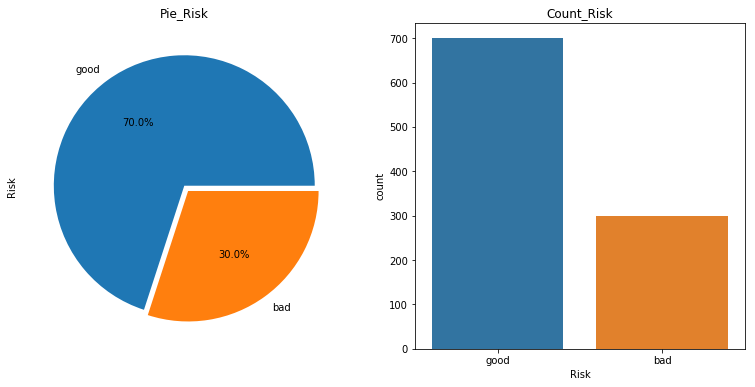

In [228]:
fig,ax=plt.subplots(1,2,figsize=(13,6))
gcr.Risk.value_counts().plot.pie(ax=ax[0], autopct='%.1f%%',explode=[0,0.05])
ax[0].set_title('Pie_Risk')
sns.countplot('Risk',data=gcr, ax=ax[1])
ax[1].set_title('Count_Risk')

# 리스크파트

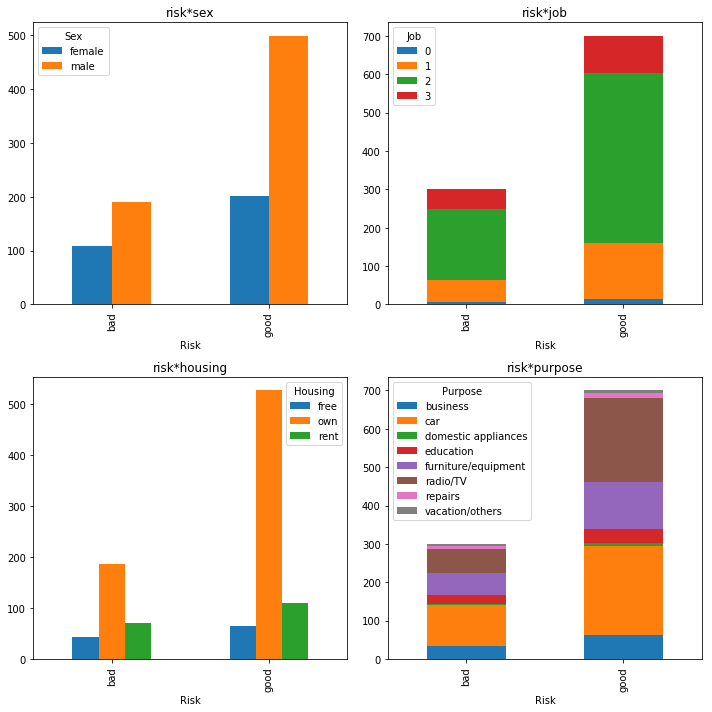

In [229]:
fig, ax=plt.subplots(2,2,figsize=(10,10))
pd.crosstab(gcr.Risk,gcr.Sex).plot(kind='bar',title='risk*sex' ,ax=ax[0][0])
pd.crosstab(gcr.Risk,gcr.Job).plot(kind='bar',stacked=True,ax=ax[0][1],title='risk*job')
pd.crosstab(gcr.Risk,gcr.Housing).plot(kind='bar',ax=ax[1][0],title='risk*housing')
pd.crosstab(gcr.Risk,gcr.Purpose).plot(kind='bar',stacked=True,figsize=(10,10),title='risk*purpose',ax=ax[1][1]) 
plt.tight_layout()
# 리스크에 따른 목적 중 하위 3개의 그래프 빈도가 비슷하므로 나중에 기타로 범주화
# 성별 그래프를 보면 리스크 비율이나 빈도가 비슷하므로 특별히 없어도 될것 같은 컬럼인 것 같다, 
#그러므로 범주가 적은 하우스 데이터와 함께 6개의 그룹으로 범주화 예상

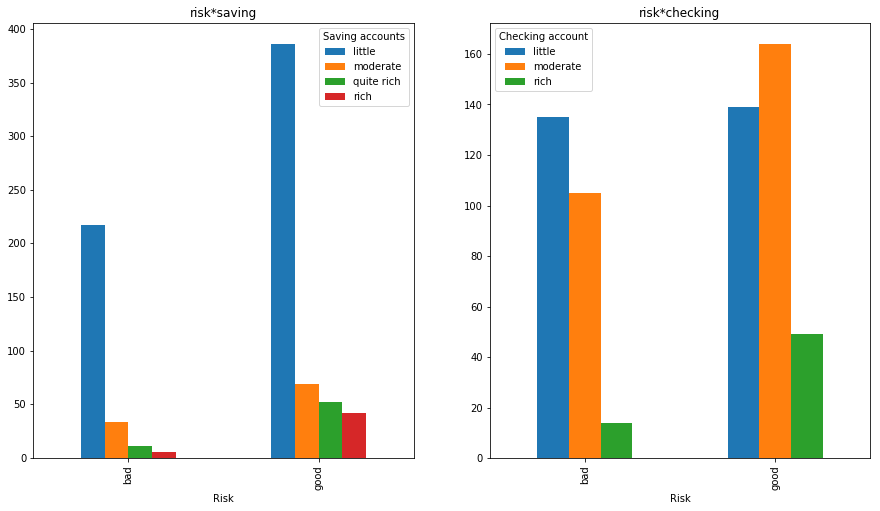

In [230]:
fig, ax=plt.subplots(1,2,figsize=(15,8))
pd.crosstab(gcr.Risk,gcr['Checking account']).plot(kind='bar',ax=ax[1],title='risk*checking')
pd.crosstab(gcr.Risk,gcr['Saving accounts']).plot(kind='bar',ax=ax[0],title='risk*saving')

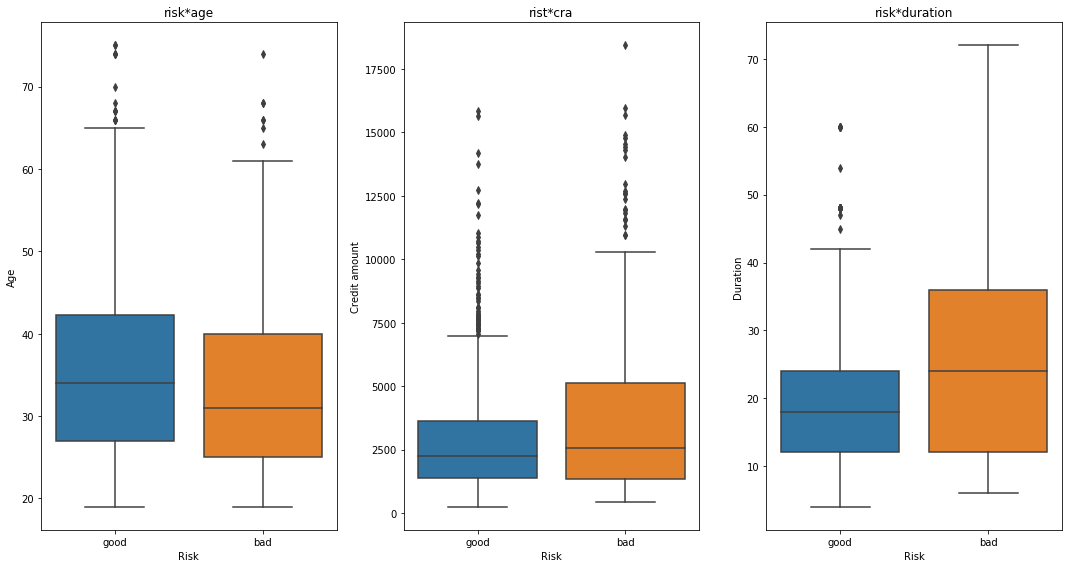

In [231]:
fig, ax= plt.subplots(1,3, figsize=(15,8))
sns.boxplot(data=gcr, x='Risk' , y='Age' ,ax=ax[0])
ax[0].set(title='risk*age')
sns.boxplot(data=gcr, x='Risk' , y='Credit amount',ax=ax[1])
ax[1].set(title='rist*cra')
sns.boxplot(data=gcr, x='Risk' , y='Duration',ax=ax[2])
ax[2].set(title='risk*duration')
plt.tight_layout()

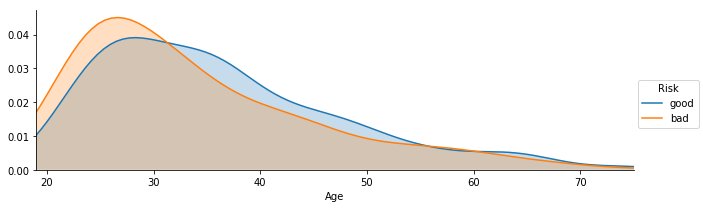

In [232]:
facet=sns.FacetGrid(gcr, hue='Risk',aspect=3) #aspect는 종이 넓이 옵션
facet.map(sns.kdeplot,'Age',shade=True)
facet.add_legend()
facet.set(xlim=(gcr['Age'].min(),gcr['Age'].max()))

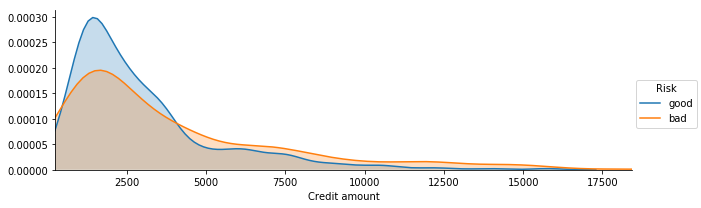

In [233]:
facet=sns.FacetGrid(gcr, hue='Risk',aspect=3) #aspect는 종이 넓이 옵션
facet.map(sns.kdeplot,'Credit amount',shade=True)
facet.add_legend()
facet.set(xlim=(gcr['Credit amount'].min(),gcr['Credit amount'].max()))

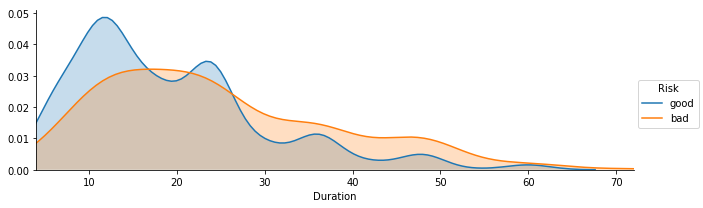

In [234]:
facet=sns.FacetGrid(gcr, hue='Risk',aspect=3) #aspect는 종이 넓이 옵션
facet.map(sns.kdeplot,'Duration',shade=True)
facet.add_legend()
facet.set(xlim=(gcr['Duration'].min(),gcr['Duration'].max()))

In [235]:

# pd.crosstab(gcr.Risk,gcr.age_n).plot(kind='bar',title='risk_age')
# pd.crosstab(gcr.Risk,gcr.cra_n).plot(kind='bar')
# pd.crosstab(gcr.Risk,gcr.dur_n).plot(kind='bar')


# 수치형 컬럼 시각화

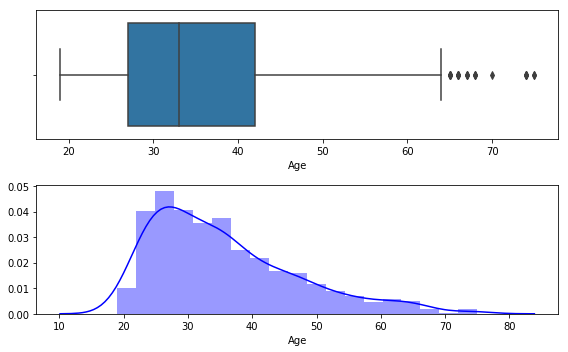

In [236]:
fig, ax=plt.subplots(2,1,figsize=(8,5))
sns.boxplot(data=gcr, x='Age' ,ax=ax[0])
sns.distplot(gcr['Age'],color='b',ax=ax[1])
plt.tight_layout()

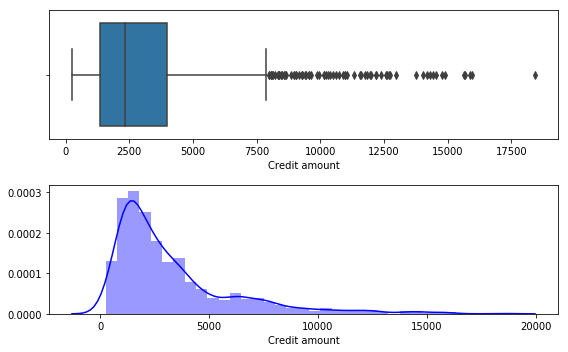

In [237]:
fig, ax=plt.subplots(2,1,figsize=(8,5))
sns.boxplot(data=gcr, x='Credit amount' ,ax=ax[0])
sns.distplot(gcr['Credit amount'],color='b',ax=ax[1])
plt.tight_layout()

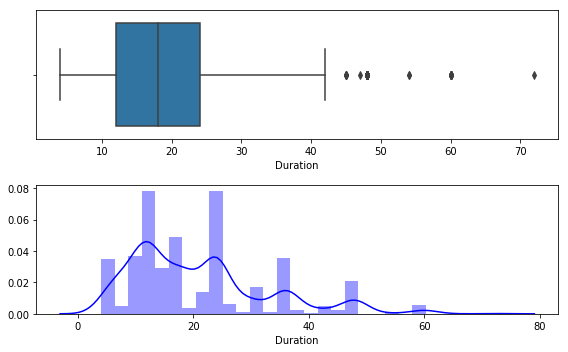

In [238]:
fig, ax=plt.subplots(2,1,figsize=(8,5))
sns.boxplot(data=gcr, x='Duration' ,ax=ax[0])
sns.distplot(gcr['Duration'],color='b',ax=ax[1])
plt.tight_layout()

In [239]:
gcr.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

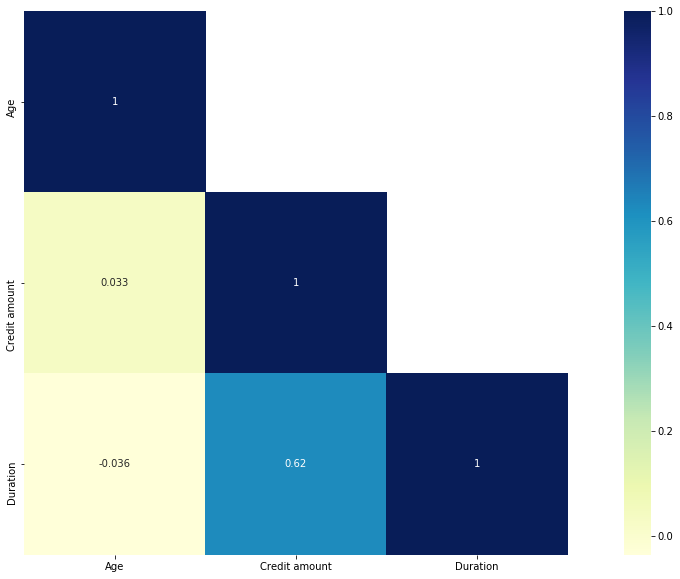

In [240]:
gcr.columns

#상관계수=> corr()함수
corrMatt=gcr[['Age', 'Credit amount', 'Duration']]#, 'Purpose', 'Risk',
       #'sex_n', 'housing_n', 'saving_n', 'checking_n', 'purpose_n', 'risk_n',
       #'age_n']]
type(corrMatt)
corrMatt=corrMatt.corr()
corrMatt

mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False #대각선 기준 한쪽만 나오게하는 것을 미리 지정
mask

fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt,mask=mask,square=True, annot=True,vmax=1,cmap="YlGnBu") #히트맵 시각화 
#annot=는 네모안에 값나오게 하는 옵션, vmax= 최대(0.8) 최소(-0.8) 지정하는 옵션


In [241]:
#누락값 처리
gcr.isnull().sum()#계좌가 없는 경우(noacc)로 nan 전처리 
gcr['Saving accounts'][gcr['Saving accounts'].isnull()]='noacc' #(gcr['Checking account'].isnull())]='noacc'
gcr['Checking account'][gcr['Checking account'].isnull()]='noacc'

In [242]:
#이상치 처리-boxplot기준 최댓값으로->63 7800 45
# print(gcr.Age.mean()+2.5*gcr.Age.std())
# print(gcr['Credit amount'].mean()+2.5*gcr['Credit amount'].std())
# print(gcr['Duration'].mean()+3*gcr['Duration'].std())

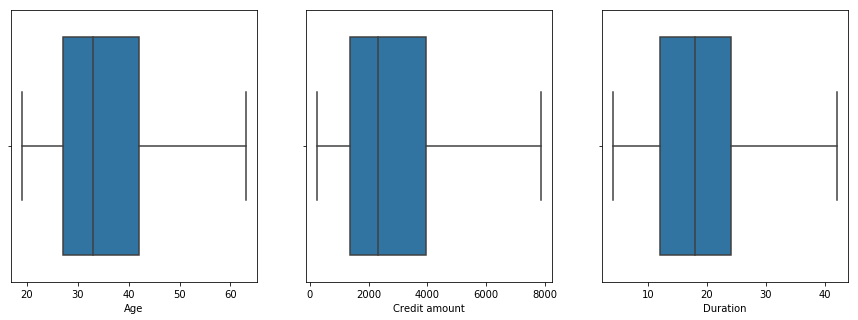

In [243]:
gcr.Age[gcr.Age>63]=63
gcr['Credit amount'][gcr['Credit amount']>=7900]=7800
gcr.Duration[gcr.Duration>43]=42
gcr.head(13)
fig, ax=plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data=gcr, x='Age',ax=ax[0])
sns.boxplot(data=gcr, x='Credit amount',ax=ax[1])
sns.boxplot(data=gcr, x='Duration',ax=ax[2])


In [244]:
gcr.head(13)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,63,male,2,own,noacc,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,42,radio/TV,bad
2,49,male,1,own,little,noacc,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,noacc,noacc,7800,36,education,good
6,53,male,2,own,quite rich,noacc,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,noacc,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


# 특성공학

In [245]:
###문자형 데이터 수치형으로 변환

#sex=> 0:female 1:male
gcr['sex_n']=gcr.Sex
gcr.sex_n[gcr.sex_n=='female']=0
gcr.sex_n[gcr.sex_n=='male']=1
gcr.sex_n=gcr.sex_n.astype(int)

#housing=> 0: own, 1:rent, 2:free
gcr['housing_n']=gcr.Housing
gcr.housing_n[gcr.housing_n=='own']=0
gcr.housing_n[gcr.housing_n=='rent']=1
gcr.housing_n[gcr.housing_n=='free']=2
gcr.housing_n=gcr.housing_n.astype(int)

#saving account=> 0:little, 1:moderate, 2:quite rich, 3: rich
gcr['saving_n']=gcr['Saving accounts']
gcr.saving_n[gcr.saving_n=='little']=0
gcr.saving_n[gcr.saving_n=='moderate']=1
gcr.saving_n[gcr.saving_n=='quite rich']=2
gcr.saving_n[gcr.saving_n=='rich']=3
gcr.saving_n[gcr.saving_n=='noacc']=4
gcr.saving_n=gcr.saving_n.astype(int)

#checking account =>0:little, 1:moderate, 2:rich 3:noacc
gcr['checking_n']=gcr['Checking account']
gcr.checking_n[gcr.checking_n=='little']=0
gcr.checking_n[gcr.checking_n=='moderate']=1
gcr.checking_n[gcr.checking_n=='rich']=2
gcr.checking_n[gcr.checking_n=='noacc']=3
gcr.checking_n=gcr.checking_n.astype(int)

#purpose=> 0:car, 1:radio/tv, 2:furniture/equipment, 3:business, 4:education, 5:repairs, domestic, vacation/others (기타)
gcr['purpose_n']=gcr['Purpose']
gcr.purpose_n[gcr.purpose_n=='car']=0
gcr.purpose_n[gcr.purpose_n=='radio/TV']=1
gcr.purpose_n[gcr.purpose_n=='furniture/equipment']=2
gcr.purpose_n[gcr.purpose_n=='business']=3
gcr.purpose_n[gcr.purpose_n=='education']=4
gcr.purpose_n[gcr.purpose_n=='repairs']=5
gcr.purpose_n[gcr.purpose_n=='domestic appliances']=5
gcr.purpose_n[gcr.purpose_n=='vacation/others']=5
gcr.purpose_n=gcr.purpose_n.astype(int)

#Risk=> 0:bad, 1:good
gcr['risk_n']=gcr['Risk']
gcr.risk_n[gcr.risk_n=='bad']=0
gcr.risk_n[gcr.risk_n=='good']=1
gcr.risk_n=gcr.risk_n.astype(int)

gcr.head(8)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,sex_n,housing_n,saving_n,checking_n,purpose_n,risk_n
0,63,male,2,own,noacc,little,1169,6,radio/TV,good,1,0,4,0,1,1
1,22,female,2,own,little,moderate,5951,42,radio/TV,bad,0,0,0,1,1,0
2,49,male,1,own,little,noacc,2096,12,education,good,1,0,0,3,4,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1,2,0,0,2,1
4,53,male,2,free,little,little,4870,24,car,bad,1,2,0,0,0,0
5,35,male,1,free,noacc,noacc,7800,36,education,good,1,2,4,3,4,1
6,53,male,2,own,quite rich,noacc,2835,24,furniture/equipment,good,1,0,2,3,2,1
7,35,male,3,rent,little,moderate,6948,36,car,good,1,1,0,1,0,1


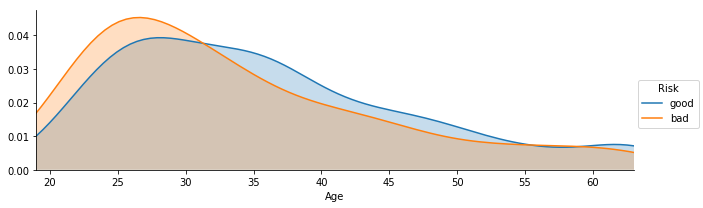

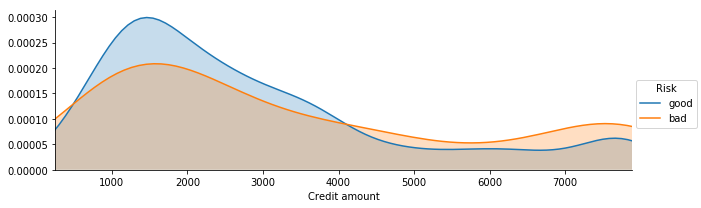

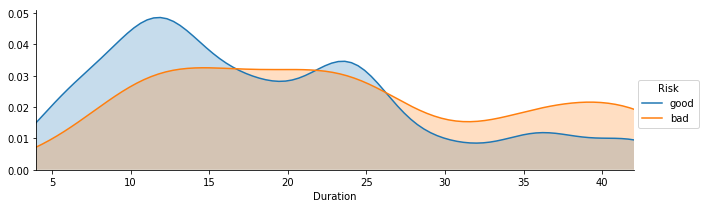

In [246]:
facet=sns.FacetGrid(gcr, hue='Risk',aspect=3) #aspect는 종이 넓이 옵션
facet.map(sns.kdeplot,'Age',shade=True)
facet.add_legend()
facet.set(xlim=(gcr['Age'].min(),gcr['Age'].max()))#gcr['Age'].max()))   gcr['Age'].min()

facet=sns.FacetGrid(gcr, hue='Risk',aspect=3) #aspect는 종이 넓이 옵션
facet.map(sns.kdeplot,'Credit amount',shade=True)
facet.add_legend()
facet.set(xlim=(gcr['Credit amount'].min(),gcr['Credit amount'].max()))#gcr['Credit amount'].max())) gcr['Credit amount'].min()

facet=sns.FacetGrid(gcr, hue='Risk',aspect=3) #aspect는 종이 넓이 옵션
facet.map(sns.kdeplot,'Duration',shade=True)
facet.add_legend()
facet.set(xlim=(gcr['Duration'].min(),gcr['Duration'].max()))#gcr['Duration'].max()  gcr['Duration'].min()

In [247]:
# #나이 범주화 :최소 19세이므로 성인 이상인 사람의 데이터로만 되어있다는 것을 알수 있음
# #그러므로 4분위 수와 인구통계학적 특성 에 의거하여 0: 사회준비생(19~27), 1:사회초년생1(27~33), 2:사회인2(33~42), 3:높은 직급 및 은퇴예비(42~
# gcr['age_n']=gcr.Age
# gcr.age_n[(gcr['age_n']>=19) & (gcr['age_n']<=31)]=0
# gcr.age_n[(gcr['age_n']>31) & (gcr['age_n']<=55)]=1
# #gcr.age_n[(gcr['age_n']>33) & (gcr['age_n']<=42)]=2
# gcr.age_n[(gcr['age_n']>55)]=2
# gcr.head()

# #0:소규모 1:중소규모 2:중규모 3:대규모 
# gcr['Cra_n']=gcr['Credit amount']
# gcr.Cra_n[(gcr['Cra_n']>=250) & (gcr['Cra_n']<=500)]=0
# gcr.Cra_n[(gcr['Cra_n']>500) & (gcr['Cra_n']<=4100)]=1
# #gcr.Cra_n[(gcr['Cra_n']>2320) & (gcr['Cra_n']<=3972)]=2
# gcr.Cra_n[(gcr['Cra_n']>4100)]=2
# gcr.head()

# #0:단기 1: 중단기 2:일반 3 장기
# gcr['Duration_n']=gcr.Duration
# gcr.Duration_n[(gcr['Duration_n']>=4) & (gcr['Duration_n']<=17)]=0
# gcr.Duration_n[(gcr['Duration_n']>17) & (gcr['Duration_n']<=22)]=1
# gcr.Duration_n[(gcr['Duration_n']>22) & (gcr['Duration_n']<=26)]=2
# gcr.Duration_n[(gcr['Duration_n']>26)]=3

# gcr.head()


In [248]:
gcr.describe().iloc[:,[0,2,3]]
gcr.quantile(0)

Age               19.0
Job                0.0
Credit amount    250.0
Duration           4.0
sex_n              0.0
housing_n          0.0
saving_n           0.0
checking_n         0.0
purpose_n          0.0
risk_n             0.0
Name: 0, dtype: float64

In [249]:
#나이 범주화 :최소 19세이므로 성인 이상인 사람의 데이터로만 되어있다는 것을 알수 있음
#그러므로 4분위 수와 인구통계학적 특성 에 의거하여 
#age_n=> 0: 사회준비생(19~27), 1:사회초년생1(27~33), 2:사회인(34~42), 3:장년층 사회인 (43~52) 4:은퇴 예비(53~)
gcr['age_n']=gcr.Age
gcr.age_n[(gcr['age_n']>=0) & (gcr['age_n']<=27)]=0
gcr.age_n[(gcr['age_n']>27) & (gcr['age_n']<=33)]=1
gcr.age_n[(gcr['age_n']>33) & (gcr['age_n']<=42)]=2
gcr.age_n[(gcr['age_n']>42) & (gcr['age_n']<=52)]=3
gcr.age_n[(gcr['age_n']>52)]=4
gcr.head()

#Cra_n=> 0:소규모 대출금액 1:중소규모 대출금액 2:중규모 대출금액 3:대규모 대출금액
gcr['Cra_n']=gcr['Credit amount']
gcr.Cra_n[(gcr['Cra_n']>=0) & (gcr['Cra_n']<=1365.5)]=0
gcr.Cra_n[(gcr['Cra_n']>1365) & (gcr['Cra_n']<=2319.5)]=1
gcr.Cra_n[(gcr['Cra_n']>2319.5) & (gcr['Cra_n']<=3972.25)]=2
gcr.Cra_n[(gcr['Cra_n']>3972.25)]=3
gcr.head()

#Duration_n=> 0:단기간 1: 중단기 2:일반(중기간) 3 장기
gcr['Duration_n']=gcr.Duration
gcr.Duration_n[(gcr['Duration_n']>=4) & (gcr['Duration_n']<=12)]=0
gcr.Duration_n[(gcr['Duration_n']>12) & (gcr['Duration_n']<=18)]=1
gcr.Duration_n[(gcr['Duration_n']>18) & (gcr['Duration_n']<=24)]=2
gcr.Duration_n[(gcr['Duration_n']>24)]=3

print(gcr['age_n'].value_counts())
print('-'*50)
print(gcr['Cra_n'].value_counts())
print('-'*50)
print(gcr['Duration_n'].value_counts())
gcr.head(15)




#Job 변수는 원래 수치형이고 구간화 되있으므로 그대로

0    291
2    249
1    225
3    139
4     96
Name: age_n, dtype: int64
--------------------------------------------------
3    250
2    250
1    250
0    250
Name: Cra_n, dtype: int64
--------------------------------------------------
0    359
3    230
2    224
1    187
Name: Duration_n, dtype: int64


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,sex_n,housing_n,saving_n,checking_n,purpose_n,risk_n,age_n,Cra_n,Duration_n
0,63,male,2,own,noacc,little,1169,6,radio/TV,good,1,0,4,0,1,1,4,0,0
1,22,female,2,own,little,moderate,5951,42,radio/TV,bad,0,0,0,1,1,0,0,3,3
2,49,male,1,own,little,noacc,2096,12,education,good,1,0,0,3,4,1,3,1,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1,2,0,0,2,1,3,3,3
4,53,male,2,free,little,little,4870,24,car,bad,1,2,0,0,0,0,4,3,2
5,35,male,1,free,noacc,noacc,7800,36,education,good,1,2,4,3,4,1,2,3,3
6,53,male,2,own,quite rich,noacc,2835,24,furniture/equipment,good,1,0,2,3,2,1,4,2,2
7,35,male,3,rent,little,moderate,6948,36,car,good,1,1,0,1,0,1,2,3,3
8,61,male,1,own,rich,noacc,3059,12,radio/TV,good,1,0,3,3,1,1,4,2,0
9,28,male,3,own,little,moderate,5234,30,car,bad,1,0,0,1,0,0,1,3,3


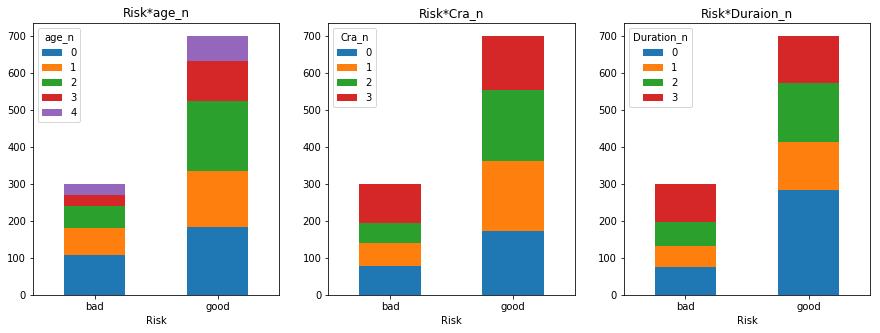

In [250]:
fig, ax= plt.subplots(1,3,figsize=(15,5))
pd.crosstab(gcr.Risk,gcr.age_n).plot(kind='bar', stacked=True, rot=0, title='Risk*age_n',ax=ax[0])
pd.crosstab(gcr.Risk,gcr.Cra_n).plot(kind='bar', stacked=True, rot=0,title='Risk*Cra_n',ax=ax[1])
pd.crosstab(gcr.Risk,gcr.Duration_n).plot(kind='bar', stacked=True, rot=0,title='Risk*Duraion_n',ax=ax[2])


# 모델링

In [428]:
gcrt=gcr.iloc[:,[2,10, 11, 12, 13, 14, 15, 16, 17, 18]]
gcrt

,Job,sex_n,housing_n,saving_n,checking_n,purpose_n,risk_n,age_n,Cra_n,Duration_n
0,2,1,0,4,0,1,1,4,0,0
1,2,0,0,0,1,1,0,0,3,3
2,1,1,0,0,3,4,1,3,1,0
3,2,1,2,0,0,2,1,3,3,3
4,2,1,2,0,0,0,0,4,3,2
5,1,1,2,4,3,4,1,2,3,3
6,2,1,0,2,3,2,1,4,2,2
7,3,1,1,0,1,0,1,2,3,3
8,1,1,0,3,3,1,1,4,2,0
9,3,1,0,0,1,0,0,1,3,3


In [429]:
# gcr.columns

In [430]:
# target=gcr.risk_n
# gcr.iloc
# gcrt_data=gcr[['Job','age_n', 'Cra_n',
#        'Duration_n', 'sex_n', 'housing_n', 'saving_n', 'checking_n',
#        'purpose_n',]]
# ##gcrt_data=gcr[['housex', 'saving_n', 'checking_n', 'cra_n','purpose_nn','age_n', 'dur_n','Job']]
# ##gcrt_data=gcr[[]]#내꺼

In [431]:
# gcrt_data

In [833]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [867]:
np.random.seed(920611)
gcrt_train,gcrt_test=train_test_split(gcrt, test_size=0.3)


In [868]:
gcrt_train.info()

gcrt_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 417 to 573
Data columns (total 10 columns):
Job           700 non-null int64
sex_n         700 non-null int32
housing_n     700 non-null int32
saving_n      700 non-null int32
checking_n    700 non-null int32
purpose_n     700 non-null int32
risk_n        700 non-null int32
age_n         700 non-null int64
Cra_n         700 non-null int64
Duration_n    700 non-null int64
dtypes: int32(6), int64(4)
memory usage: 43.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 876 to 28
Data columns (total 10 columns):
Job           300 non-null int64
sex_n         300 non-null int32
housing_n     300 non-null int32
saving_n      300 non-null int32
checking_n    300 non-null int32
purpose_n     300 non-null int32
risk_n        300 non-null int32
age_n         300 non-null int64
Cra_n         300 non-null int64
Duration_n    300 non-null int64
dtypes: int32(6), int64(4)
memory usage: 18.8 KB


In [869]:
#각 데이터셋에서 리스크로 target 변수 만들기
train_target=gcrt_train.risk_n 
test_target=gcrt_test.risk_n
gcrt.columns

Index(['Job', 'sex_n', 'housing_n', 'saving_n', 'checking_n', 'purpose_n',
       'risk_n', 'age_n', 'Cra_n', 'Duration_n'],
      dtype='object')

In [870]:
#리스크 컬럼 제외한 데이터 셋 만들기
gcrt_train_data=gcrt_train[['Job', 'sex_n', 'housing_n', 'saving_n', 'checking_n', 'purpose_n','age_n', 'Cra_n', 'Duration_n']]
gcrt_test_data=gcrt_test[['Job', 'sex_n', 'housing_n', 'saving_n', 'checking_n', 'purpose_n','age_n', 'Cra_n', 'Duration_n']]
gcrt_train_data.info()
gcrt_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 417 to 573
Data columns (total 9 columns):
Job           700 non-null int64
sex_n         700 non-null int32
housing_n     700 non-null int32
saving_n      700 non-null int32
checking_n    700 non-null int32
purpose_n     700 non-null int32
age_n         700 non-null int64
Cra_n         700 non-null int64
Duration_n    700 non-null int64
dtypes: int32(5), int64(4)
memory usage: 41.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 876 to 28
Data columns (total 9 columns):
Job           300 non-null int64
sex_n         300 non-null int32
housing_n     300 non-null int32
saving_n      300 non-null int32
checking_n    300 non-null int32
purpose_n     300 non-null int32
age_n         300 non-null int64
Cra_n         300 non-null int64
Duration_n    300 non-null int64
dtypes: int32(5), int64(4)
memory usage: 17.6 KB


In [871]:
kfold=KFold(n_splits=10, shuffle=True, random_state=0) 
kfold

KFold(n_splits=10, random_state=0, shuffle=True)

In [872]:
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #나이브베이즈
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn.tree import DecisionTreeClassifier #의사결정나무
from sklearn.svm import SVC #SVC

In [873]:
clf=KNeighborsClassifier() 
score=cross_val_score(clf,gcrt_train_data, train_target, cv=kfold) 
print(score)
round(np.mean(score)*100,2) #kmeans

[0.64285714 0.61428571 0.7        0.75714286 0.67142857 0.81428571
 0.64285714 0.74285714 0.71428571 0.7       ]


70.0

In [874]:
clf=GaussianNB()#나이브베이즈
score=cross_val_score(clf,gcrt_train_data, train_target, cv=kfold) 
print(score)
round(np.mean(score)*100,2)# 나이브 베이즈

[0.72857143 0.72857143 0.72857143 0.75714286 0.75714286 0.72857143
 0.71428571 0.77142857 0.75714286 0.74285714]


74.14

In [875]:
#랜덤포레스트
clf=RandomForestClassifier() 
score=cross_val_score(clf,gcrt_train_data, train_target, cv=kfold) 
print(score)
round(np.mean(score)*100,2)

[0.64285714 0.58571429 0.71428571 0.68571429 0.62857143 0.75714286
 0.64285714 0.7        0.67142857 0.77142857]


68.0

In [876]:
#의사결정나무
clf=DecisionTreeClassifier() 
score=cross_val_score(clf,gcrt_train_data, train_target, cv=kfold) 
print(score)
round(np.mean(score)*100,2)

[0.58571429 0.55714286 0.64285714 0.55714286 0.54285714 0.78571429
 0.64285714 0.54285714 0.6        0.74285714]


62.0

In [877]:
clf=SVC() 
score=cross_val_score(clf,gcrt_train_data, train_target, cv=kfold) 
print(score)
round(np.mean(score)*100,2)

[0.65714286 0.65714286 0.74285714 0.74285714 0.71428571 0.8
 0.72857143 0.77142857 0.72857143 0.71428571]


72.57

In [976]:
tes = {'Model': ['KNeighborsClassifier',  'GaussianNB', 'RandomForestClassifier',  'DecisionTreeClassifier',  'SVC'], 
       'Value': [70.0,74.14,68.0,62.0,72.57]}
tdf= pd.DataFrame(data=tes)
tdf

,Model,Value
0,KNeighborsClassifier,70.00
1,GaussianNB,74.14
2,RandomForestClassifier,68.00
3,DecisionTreeClassifier,62.00
4,SVC,72.57


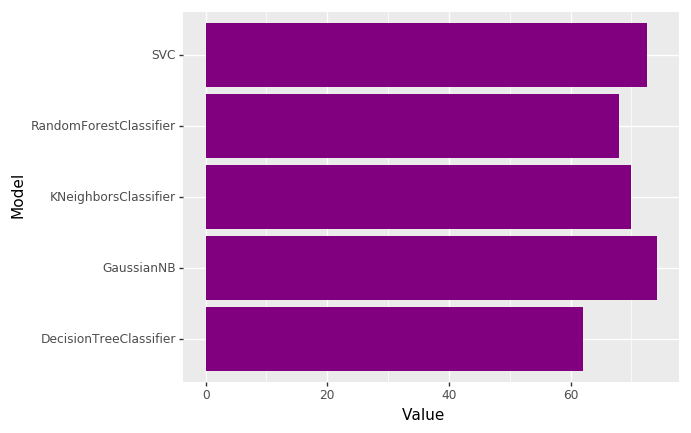

<ggplot: (159094000560)>

In [988]:
(ggplot(tdf)
 +aes(x='Model',y='Value')
+geom_bar(stat='identity',position='dodge',fill='purple')
+coord_flip()) 

# test에 적용 모델 평가

In [978]:
clf=KNeighborsClassifier()  #GaussianNB() #RandomForestClassifier()  #DecisionTreeClassifier()  #SVC()
clf.fit(gcrt_train_data, train_target)#fit() 함수는 모델적용, 즉 모델을 만드는 함수 #위 knn 나이브베이즈 들은 모델을 검증하는 것들
prediction=clf.predict(gcrt_test_data) #예측값 yhat
print("정확도:", round(accuracy_score(test_target,prediction),4)*100,'%')

정확도: 72.0 %


In [979]:
clf=GaussianNB() #RandomForestClassifier()  #DecisionTreeClassifier()  #SVC()
clf.fit(gcrt_train_data, train_target)#fit() 함수는 모델적용, 즉 모델을 만드는 함수 #위 knn 나이브베이즈 들은 모델을 검증하는 것들
prediction=clf.predict(gcrt_test_data) #예측값 yhat
print("정확도:", round(accuracy_score(test_target,prediction),4)*100,'%')

정확도: 74.67 %


In [980]:
clf=RandomForestClassifier()  #DecisionTreeClassifier()  #SVC()
clf.fit(gcrt_train_data, train_target)#fit() 함수는 모델적용, 즉 모델을 만드는 함수 #위 knn 나이브베이즈 들은 모델을 검증하는 것들
prediction=clf.predict(gcrt_test_data) #예측값 yhat
print("정확도:", round(accuracy_score(test_target,prediction),4)*100,'%')

정확도: 67.0 %


In [981]:
clf=DecisionTreeClassifier()  #SVC()
clf.fit(gcrt_train_data, train_target)#fit() 함수는 모델적용, 즉 모델을 만드는 함수 #위 knn 나이브베이즈 들은 모델을 검증하는 것들
prediction=clf.predict(gcrt_test_data) #예측값 yhat
print("정확도:", round(accuracy_score(test_target,prediction),4)*100,'%')

정확도: 63.0 %


In [982]:
clf=SVC()
clf.fit(gcrt_train_data, train_target)#fit() 함수는 모델적용, 즉 모델을 만드는 함수 #위 knn 나이브베이즈 들은 모델을 검증하는 것들
prediction=clf.predict(gcrt_test_data) #예측값 yhat
print("정확도:", round(accuracy_score(test_target,prediction),4)*100,'%')

정확도: 73.33 %


In [983]:
res = {'Model': ['KNeighborsClassifier',  'GaussianNB', 'RandomForestClassifier',  'DecisionTreeClassifier',  'SVC'], 
       'Value': [72.0,74.67,67,63,73.33]}
df = pd.DataFrame(data=res)
df




,Model,Value
0,KNeighborsClassifier,72.00
1,GaussianNB,74.67
2,RandomForestClassifier,67.00
3,DecisionTreeClassifier,63.00
4,SVC,73.33


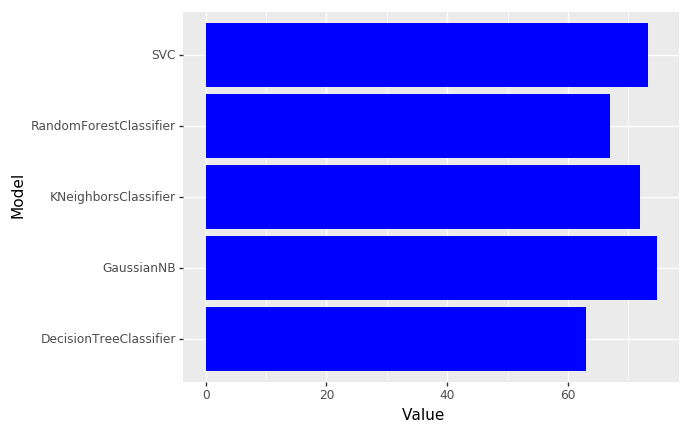

<ggplot: (159097050909)>

In [984]:
(ggplot(df)
 +aes(x='Model',y='Value')
+geom_bar(stat='identity',position='dodge',fill='blue')
+coord_flip()) 
